# GCC118 - Programação Matemática
## Universidade Federal de Lavras
### Instituto de Ciências Exatas e Tecnológicas
#### Profa. Andreza C. Beezão Moreira (DMM/UFLA)
#### Prof. Mayron César O. Moreira (DCC/UFLA)
#### Aluno: Bruno Crespo Ferreira

## Problema

Uma empresa transporta óleo de uma estação A para uma estação B. Existe uma rota norte e uma rota sul, ambas com uma estação intermediária. Ainda existe uma ligação da estação intermediária sul para estação intermediária norte. A Figura 1 abaixo mostra a situação junto com as capacidades das ligações em barris por dia. Formule um programa linear, utilizando gurobipy, que maximiza os barris por dia transportados de A para B. Faça uma análise de sensibilidade, e discuta o que tal análise reportará.


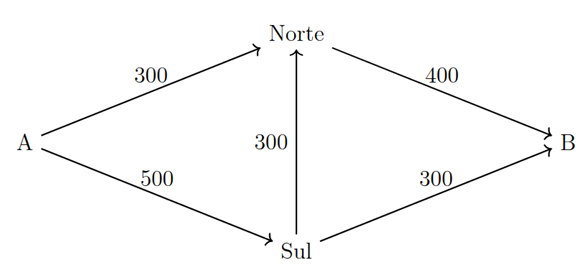

## 1) Modelagem Matemática e Solução Ótima

O PL pode ser modelado como um problema de rede de fluxo.

### Parâmetros

O grafo disponibiliza o número máximo de barris quem podem ser transportados em cada situação por meio de pesos nas arestas direcionais.

Portanto, temos as seguintes capacidades máximas:
\begin{alignat}{2}
A → Norte: 300 \ \text{barris/dia}; \\
Norte → B: 400 \ \text{barris/dia}; \\
A → Sul: 500 \ \text{barris/dia}; \\
Sul → B: 300 \ \text{barris/dia}; \\
Sul → Norte: 300 \ \text{barris/dia}. \\
\end{alignat}


### Variáveis

* $x_{1}$: número de barris/dia de $A → Norte$;
* $x_{2}$: número de barris/dia de $Norte → B$;
* $x_{3}$: número de barris/dia de $A → Sul$;
* $x_{4}$: número de barris/dia de $Sul → B$;
* $x_{5}$: número de barris/dia de $Sul → Norte$.

### Função Objetivo

Consiste em **maximizar** os barris por dia transportados de A para B.
\begin{equation}
max f(x) = x_{1} + x_{2} + x_{3} + x_{4} + x_{5}
\end{equation}

### Restrições

* Restrição 1: Capacidade máxima de barris/dia de cada aresta.
\begin{alignat}{2}
x_{1} \le 300 \\
x_{2} \le 400 \\
x_{3} \le 500 \\
x_{4} \le 300 \\
x_{5} \le 300
\end{alignat}

* Restrição 2: Conservação de fluxo em cada estação intermediária.
\begin{alignat}{2}
x_{2} = x_{1} + x_{5} \quad (\text{Norte}) \\
x_{4} + x_{5} = x_{3} \quad (\text{Sul})
\end{alignat}

### Modelo

\begin{equation}
max f(x) = x_{1} + x_{2} + x_{3} + x_{4} + x_{5}
\end{equation}

sujeito a:

\begin{alignat}{2}
x_{1} \le 300 \\
x_{2} \le 400 \\
x_{3} \le 500 \\
x_{4} \le 300 \\
x_{5} \le 300 \\
x_{2} = x_{1} + x_{5} \\
x_{4} + x_{5} = x_{3} \\
x_{i} \ge 0, \quad i = 1,..., 5
\end{alignat}

### Instalação da biblioteca Gurobi

In [ ]:
!pip install gurobipy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.4/14.4 MB 55.9 MB/s eta 0:00:00


### Declaração do objeto que representa o modelo matemático

In [ ]:
from gurobipy import Model, GRB

modelo = Model("transportadora_oleos")

### Variáveis de decisão

In [ ]:
A_Norte_var = modelo.addVar(name="A_Norte", vtype=GRB.CONTINUOUS, lb=0)
Norte_B_var = modelo.addVar(name="Norte_B", vtype=GRB.CONTINUOUS, lb=0)
A_Sul_var = modelo.addVar(name="A_Sul", vtype=GRB.CONTINUOUS, lb=0)
Sul_B_var = modelo.addVar(name="Sul_B", vtype=GRB.CONTINUOUS, lb=0)
Sul_Norte_var = modelo.addVar(name="Sul_Norte", vtype=GRB.CONTINUOUS, lb=0)

### Função objetivo

In [ ]:
modelo.setObjective(A_Norte_var + Norte_B_var + A_Sul_var + Sul_B_var + Sul_Norte_var, GRB.MAXIMIZE)

### Restrições

In [ ]:
modelo.addConstr(A_Norte_var <= 300, "capacidade_A_Norte")
modelo.addConstr(Norte_B_var <= 400, "capacidade_Norte_B")
modelo.addConstr(A_Sul_var <= 500, "capacidade_A_Sul")
modelo.addConstr(Sul_B_var <= 300, "capacidade_Sul_B")
modelo.addConstr(Sul_Norte_var <= 300, "capacidade_Sul_Norte")
modelo.addConstr(Norte_B_var == A_Norte_var + Sul_Norte_var, "conservacao_Norte")
modelo.addConstr(Sul_B_var + Sul_Norte_var == A_Sul_var, "conservacao_Sul")

<gurobi.Constr *Awaiting Model Update*>

### Resolvendo o problema

In [ ]:
modelo.optimize()

Gurobi Optimizer version 12.0.0 build v12.0.0rc1 (linux64 - "Ubuntu 22.04.3 LTS")

CPU model: Intel(R) Xeon(R) CPU @ 2.20GHz, instruction set [SSE2|AVX|AVX2]
Thread count: 1 physical cores, 2 logical processors, using up to 2 threads

Optimize a model with 7 rows, 5 columns and 11 nonzeros
Model fingerprint: 0xcf95365e
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [1e+00, 1e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [3e+02, 5e+02]
Presolve removed 5 rows and 0 columns
Presolve time: 0.01s
Presolved: 2 rows, 5 columns, 6 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    1.8000000e+03   3.750000e+01   0.000000e+00      0s
       2    1.6000000e+03   0.000000e+00   0.000000e+00      0s

Solved in 2 iterations and 0.02 seconds (0.00 work units)
Optimal objective  1.600000000e+03


### Imprimindo as soluções do problema

In [ ]:
if(modelo.status == GRB.OPTIMAL):
  print(f"A → Norte: {A_Norte_var.X}")
  print(f"Norte → B: {Norte_B_var.X}")
  print(f"A → Sul: {A_Sul_var.X}")
  print(f"Sul → B: {Sul_B_var.X}")
  print(f"Sul → Norte: {Sul_Norte_var.X}")
  print(f"Valor ótimo: {modelo.objVal}")

A → Norte: 200.0
Norte → B: 400.0
A → Sul: 500.0
Sul → B: 300.0
Sul → Norte: 200.0
Valor ótimo: 1600.0


## 2) Análise de Sensibilidade

In [ ]:
print("\nIntervalos de Custos (Vetor de Custos):")
for variavel in modelo.getVars():
  print(f"Variável {variavel.VarName}:")
  print(f"  lower bound do custo (SAObjLow): {variavel.SAObjLow}")
  print(f"  upper bound do custo (SAObjUp): {variavel.SAObjUp}")

print("\nIntervalos de Recursos (Vetor de Recursos):")
for restricao in modelo.getConstrs():
  print(f"Restrição {restricao.ConstrName}:")
  print(f"  lower bound do recurso (SARHSLow): {restricao.SARHSLow}")
  print(f"  upper bound do recurso (SARHSUp): {restricao.SARHSUp}")


Intervalos de Custos (Vetor de Custos):
Variável A_Norte:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): 2.0
Variável Norte_B:
  lower bound do custo (SAObjLow): -1.0
  upper bound do custo (SAObjUp): inf
Variável A_Sul:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): inf
Variável Sul_B:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): inf
Variável Sul_Norte:
  lower bound do custo (SAObjLow): -0.0
  upper bound do custo (SAObjUp): 2.0

Intervalos de Recursos (Vetor de Recursos):
Restrição capacidade_A_Norte:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): inf
Restrição capacidade_Norte_B:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso (SARHSUp): 500.0
Restrição capacidade_A_Sul:
  lower bound do recurso (SARHSLow): 400.0
  upper bound do recurso (SARHSUp): 600.0
Restrição capacidade_Sul_B:
  lower bound do recurso (SARHSLow): 200.0
  upper bound do recurso

### Vetor de Custos

* Infinitos: Norte → B, A → Sul e Sul → B tendem ao mais infinito, ou seja, não importa o quando aumentarmos o custo dessas variáveis, isso não alterará a solução ótima. Portanto, a solução básica não muda.
* Custo inferior a 0: Todas as variáveis, exceto Norte → B, possuem um limitante inferior a 0, isso indica que se seus custos forem inferiores a 0, eles sairão da base;
* Norte → B: O interessante dessa variável é perceber que ela pode assumir um valor nulo e mesmo assim não sairá da base;
* A → Norte e Sul → Norte: essas variáveis possuem um limitante superior igual a 2. Isso indica que ao aumentar o custo delas, seus caminhos terão uma importância maior. Isso é bastante interessante, pois podemos definir diferentes rotas que garantem a mesma quantidade de barris/dia, mas o fluxo é diferente.

###  Vetor de Recursos

* Infinitos: não importa o quanto capacidade_A_Norte ou capacidade_Sul_Norte aumentem, a solução ótima sempre será a mesma;
* Para os demais valores há sempre um limite inferior e superior, indicando que se o recurso ultrapassar um desses valores algum elemento da solução básica será negativo, ou seja, o PL se torna infactível e será necessário ser resolvido novamente.